#  Analysis of Cricket Player's Performance using Machine Learning:
#### In this Project we will Analyse this player's stats and build a Machine learning model which will predict top performer.


In [2]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset

df = pd.read_csv("D:\My work\Datasets\IPL.csv")
print(df.shape)
df.head(10)

(1200, 18)


,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Nationality,Player Link,Team,Season
0,1,David Warner,12,12,2,692,100,69.20,481,143.86,1,8,57,21,Overseas,https://www.iplt20.com/teams/sunrisers-hyderab...,Sunrisers Hyderabad,2019
1,2,KL Rahul,14,14,3,593,100,53.90,438,135.38,1,6,49,25,Indian,https://www.iplt20.com/teams/kings-xi-punjab/s...,Kings Xi Punjab,2019
2,3,Quinton de Kock,16,16,1,529,81,35.26,398,132.91,0,4,45,25,Overseas,https://www.iplt20.com/teams/mumbai-indians/sq...,Mumbai Indians,2019
3,4,Shikhar Dhawan,16,16,1,521,97,34.73,384,135.67,0,5,64,11,Indian,https://www.iplt20.com/teams/delhi-capitals/sq...,Delhi Capitals,2019
4,5,Andre Russell,14,13,4,510,80,56.66,249,204.81,0,4,31,52,Overseas,https://www.iplt20.com/teams/kolkata-knight-ri...,Kolkata Knight Riders,2019
5,6,Chris Gayle,13,13,1,490,99,40.83,319,153.60,0,4,45,34,Overseas,https://www.iplt20.com/teams/kings-xi-punjab/s...,Kings Xi Punjab,2019
6,7,Rishabh Pant,16,16,3,488,78,37.53,300,162.66,0,3,37,27,Indian,https://www.iplt20.com/teams/delhi-capitals/sq...,Delhi Capitals,2019
7,8,Virat Kohli,14,14,0,464,100,33.14,328,141.46,1,2,46,13,Indian,https://www.iplt20.com/teams/royal-challengers...,Royal Challengers Bangalore,2019
8,9,Shreyas Iyer,16,16,1,463,67,30.86,386,119.94,0,3,41,14,Indian,https://www.iplt20.com/teams/delhi-capitals/sq...,Delhi Capitals,2019
9,10,Jonny Bairstow,10,10,2,445,114,55.62,283,157.24,1,2,48,18,Overseas,https://www.iplt20.com/teams/sunrisers-hyderab...,Sunrisers Hyderabad,2019


##### Data Cleaning

In [4]:
# Renaming column name as they are not written in good manner

df.rename(columns={'POS':'Position',
                   'PLAYER':'Player',
                   'Mat': 'Matches',
                   'Inns': 'Innings',
                   'NO': 'Not Outs',
                   'Runs': 'Runs',
                   'HS': 'Highest Score',
                   'Avg': 'Average',
                   'BF': 'Balls Faced',
                   'SR': 'Strike Rate',
                   '100': 'Hundreds',
                   '50': 'Fifties',
                   '4s': 'Fours',
                   '6s': 'Sixes'}, inplace=True)

df = df.drop(columns=['Position','Player Link'])
df.head()

,Player,Matches,Innings,Not Outs,Runs,Highest Score,Average,Balls Faced,Strike Rate,Hundreds,Fifties,Fours,Sixes,Nationality,Team,Season
0,David Warner,12,12,2,692,100,69.20,481,143.86,1,8,57,21,Overseas,Sunrisers Hyderabad,2019
1,KL Rahul,14,14,3,593,100,53.90,438,135.38,1,6,49,25,Indian,Kings Xi Punjab,2019
2,Quinton de Kock,16,16,1,529,81,35.26,398,132.91,0,4,45,25,Overseas,Mumbai Indians,2019
3,Shikhar Dhawan,16,16,1,521,97,34.73,384,135.67,0,5,64,11,Indian,Delhi Capitals,2019
4,Andre Russell,14,13,4,510,80,56.66,249,204.81,0,4,31,52,Overseas,Kolkata Knight Riders,2019


In [5]:
# Checking null values

df.isna().sum().sum()

0

* No null values found

In [6]:
# Checking duplicate rows

df.duplicated().sum()

2

In [62]:
# Removing duplicate rows

df = df.drop_duplicates()
df.duplicated().sum()

0

In [63]:
# Checking 'Nan' word in data and removing it

nan_sum = df.applymap(lambda x: np.sum([1 for i in str(x).split() if i.lower() == 'nan'])).sum()

for column in df.columns:
    df[column] = df[column].apply(lambda x: 'unknown team' if 'Nan' in str(x) else x)

print(f"Sum of 'Nan' values:\n {nan_sum}")
print("Replaced 'Nan' values with 'Unknown Team'. Updated DataFrame:")

Sum of 'Nan' values:
 Player             0.0
Matches            0.0
Innings            0.0
Not Outs           0.0
Runs               0.0
Highest Score      0.0
Average            0.0
Balls Faced        0.0
Strike Rate        0.0
Hundreds           0.0
Fifties            0.0
Fours              0.0
Sixes              0.0
Nationality        0.0
Team             154.0
Season             0.0
dtype: float64
Replaced 'Nan' values with 'Unknown Team'. Updated DataFrame:


In [64]:
# changing column name 'Kings XI Punjab' to 'KXIP'

df['Team'] = df['Team'].apply(lambda x: x.replace('Kings XI Punjab', 'KXIP'))

In [65]:
# adding a column which hold to overall performance of the players 

df['Performance'] = (df['Matches'] + df['Innings'] + df['Not Outs'] + df['Runs'] + df['Highest Score'] + df['Average'] + df['Balls Faced'] + df['Strike Rate'] + df['Hundreds'] + df['Fifties'] + df['Fours'] + df['Sixes']) 

In [66]:
# checking stats and quantile range of new column 'Performance'

df['Performance'].describe()

count    1198.000000
mean      560.432563
std       342.519797
min       107.780000
25%       275.022500
50%       466.680000
75%       795.702500
max      2127.110000
Name: Performance, dtype: float64

In [67]:
# now creating a new column 'Performance Category' from 'Performance' for further analysis 

df['Performance'] = pd.to_numeric(df['Performance'], errors='coerce')

def categorize_performance(performance):
    if performance >= 1400:
        return 'Great'
    elif 1399 >= performance >= 900:
        return 'Good'
    elif 899 >= performance >= 466:
        return 'Average'
    else:
        return 'Need Improvement'

df['Performance Category'] = df['Performance'].apply(categorize_performance)
df.head(10)

,Player,Matches,Innings,Not Outs,Runs,Highest Score,Average,Balls Faced,Strike Rate,Hundreds,Fifties,Fours,Sixes,Nationality,Team,Season,Performance,Performance Category
0,David Warner,12,12,2,692,100,69.20,481,143.86,1,8,57,21,Overseas,Sunrisers Hyderabad,2019,1599.06,Great
1,KL Rahul,14,14,3,593,100,53.90,438,135.38,1,6,49,25,Indian,Kings Xi Punjab,2019,1432.28,Great
2,Quinton de Kock,16,16,1,529,81,35.26,398,132.91,0,4,45,25,Overseas,Mumbai Indians,2019,1283.17,Good
3,Shikhar Dhawan,16,16,1,521,97,34.73,384,135.67,0,5,64,11,Indian,Delhi Capitals,2019,1285.40,Good
4,Andre Russell,14,13,4,510,80,56.66,249,204.81,0,4,31,52,Overseas,Kolkata Knight Riders,2019,1218.47,Good
5,Chris Gayle,13,13,1,490,99,40.83,319,153.60,0,4,45,34,Overseas,Kings Xi Punjab,2019,1212.43,Good
6,Rishabh Pant,16,16,3,488,78,37.53,300,162.66,0,3,37,27,Indian,Delhi Capitals,2019,1168.19,Good
7,Virat Kohli,14,14,0,464,100,33.14,328,141.46,1,2,46,13,Indian,Royal Challengers Bangalore,2019,1156.60,Good
8,Shreyas Iyer,16,16,1,463,67,30.86,386,119.94,0,3,41,14,Indian,Delhi Capitals,2019,1157.80,Good
9,Jonny Bairstow,10,10,2,445,114,55.62,283,157.24,1,2,48,18,Overseas,Sunrisers Hyderabad,2019,1145.86,Good


In [68]:
# checking value count of each catagory in 'Performance Category' column

df['Performance Category'].value_counts()

Need Improvement    599
Average             374
Good                205
Great                20
Name: Performance Category, dtype: int64

##### Now Data is claened. We can move to "EDA"

In [69]:
# Now let's check how many team are there and season also. let's check player count also

df['Team'] = df['Team'].apply(lambda x: x.replace('Kings XI Punjab', 'KXIP'))

unique_players = df['Player'].nunique()
unique_teams = df['Team'].nunique()
unique_seasons = df['Season'].nunique()

print('\033[1m' + f"Players: {unique_players}" + '\033[0m')  
print('\033[1m' + f"Teams: {unique_teams}" + '\033[0m')  
print('\033[1m' + f"Seasons: {unique_seasons}" + '\033[0m')
print("-------------------------------\n")

print("\033[1mTeams :\033[0m")
for team in df['Team'].unique():
    print(team)
print("-------------------------------")    

print("\n\033[1mSeasons :\033[0m")
for season in df['Season'].unique():
    print(season)

Players: 356
Teams: 9
Seasons: 12
-------------------------------

Teams :
Sunrisers Hyderabad
Kings Xi Punjab
Mumbai Indians
Delhi Capitals
Kolkata Knight Riders
Royal Challengers Bangalore
Chennai Super Kings
Rajasthan Royals
unknown team
-------------------------------

Seasons :
2019
2018
2017
2016
2015
2014
2013
2012
2011
2010
2009
2008


In [70]:
# exploring player names

unique_players = []
unique_players = df['Player'].unique()

print("\033[1mUnique Player Names:\n\033[0m")
print(', '.join(unique_players))


Unique Player Names:

David Warner, KL Rahul, Quinton de Kock, Shikhar Dhawan, Andre Russell, Chris Gayle, Rishabh Pant, Virat Kohli, Shreyas Iyer, Jonny Bairstow, AB de Villiers, Suryakumar Yadav, MS Dhoni, Chris Lynn, Rohit Sharma, Hardik Pandya, Shane Watson, Faf du Plessis, Ajinkya Rahane, Suresh Raina, Parthiv Patel, Prithvi Shaw, Manish Pandey, Nitish Rana, Sanju Samson, Mayank Agarwal, Steve Smith, Jos Buttler, Shubman Gill, Ambati Rayudu, Robin Uthappa, Kieron Pollard, Dinesh Karthik, Vijay Shankar, Moeen Ali, David Miller, Marcus Stoinis, Colin Ingram, Krunal Pandya, Sarfaraz Khan, Nicholas Pooran, Mandeep Singh, Kedar Jadhav, Riyan Parag, Kane Williamson, Sunil Narine, Rahul Tripathi, Ben Stokes, Mohammad Nabi, Axar Patel, Ravindra Jadeja, Ishan Kishan, Yuvraj Singh, Gurkeerat Mann Singh, Sam Curran, Shimron Hetmyer, Wriddhiman Saha, Colin Munro, Martin Guptill, Dwayne Bravo, Sherfane Rutherford, Liam Livingstone, Stuart Binny, Jofra Archer, Deepak Hooda, Murali Vijay, Shreya

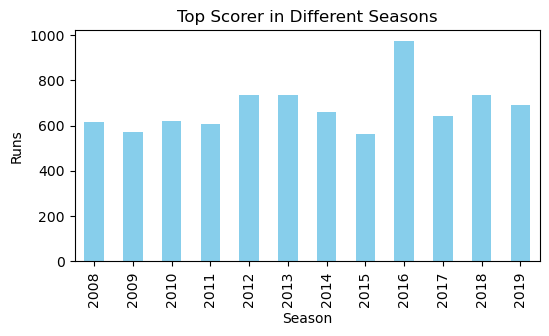

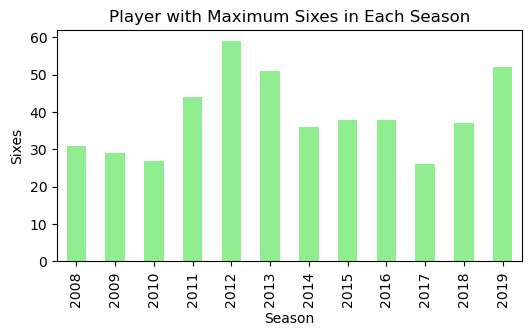

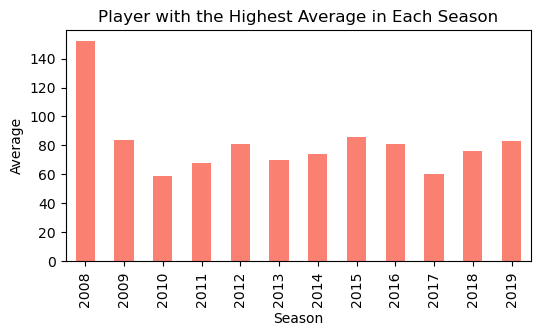

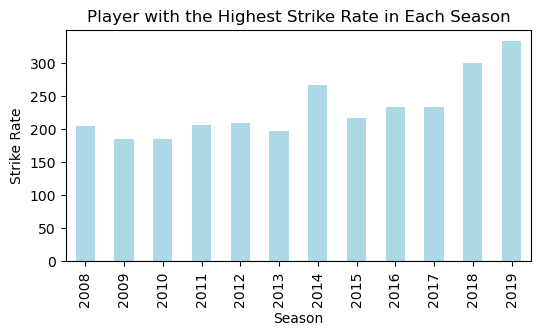

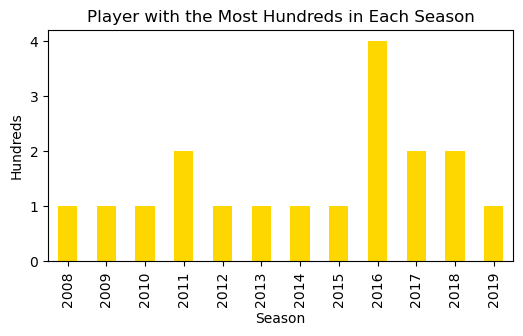

In [71]:
# Plot to show the top scorer in different seasons
top_scorer_season = df.groupby('Season')['Runs'].max()
plt.figure(figsize=(6, 3))
top_scorer_season.plot(kind='bar', color='skyblue')
plt.title('Top Scorer in Different Seasons')
plt.xlabel('Season')
plt.ylabel('Runs')
plt.show()

# Plot to show the player with the maximum sixes in each season
max_sixes_season = df.groupby('Season')['Sixes'].max()
plt.figure(figsize=(6, 3))
max_sixes_season.plot(kind='bar', color='lightgreen')
plt.title('Player with Maximum Sixes in Each Season')
plt.xlabel('Season')
plt.ylabel('Sixes')
plt.show()

# Plot to show the player with the highest average in each season
max_average_season = df.groupby('Season')['Average'].max()
plt.figure(figsize=(6, 3))
max_average_season.plot(kind='bar', color='salmon')
plt.title('Player with the Highest Average in Each Season')
plt.xlabel('Season')
plt.ylabel('Average')
plt.show()

# Plot to show the player with the highest strike rate in each season
max_strike_rate_season = df.groupby('Season')['Strike Rate'].max()
plt.figure(figsize=(6, 3))
max_strike_rate_season.plot(kind='bar', color='lightblue')
plt.title('Player with the Highest Strike Rate in Each Season')
plt.xlabel('Season')
plt.ylabel('Strike Rate')
plt.show()

# Plot to show the player with the most hundreds in each season
max_hundreds_season = df.groupby('Season')['Hundreds'].max()
plt.figure(figsize=(6, 3))
max_hundreds_season.plot(kind='bar', color='gold')
plt.title('Player with the Most Hundreds in Each Season')
plt.xlabel('Season')
plt.ylabel('Hundreds')
plt.show()


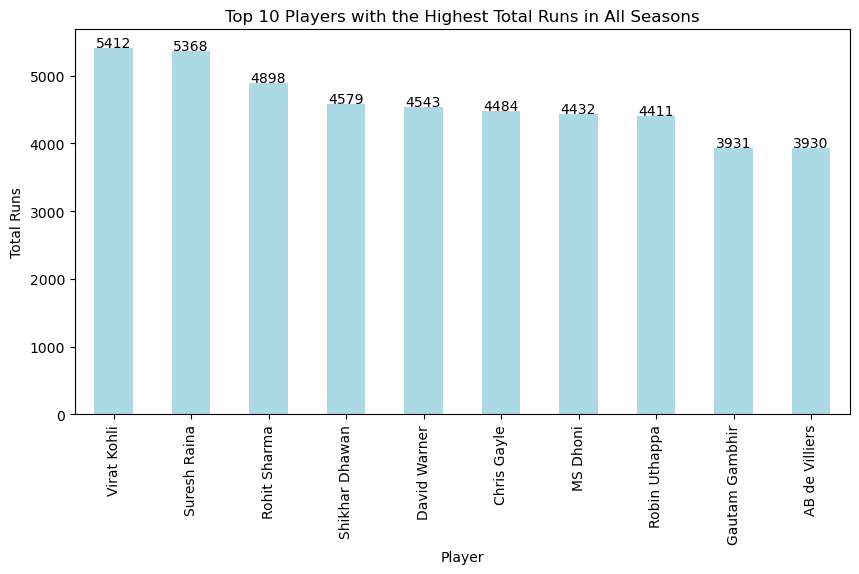

In [72]:
# plot to show top 10 plyers of all time on the basis of runs

total_runs_by_player = df.groupby('Player')['Runs'].sum()
total_runs_by_player = total_runs_by_player.sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 5))
ax = total_runs_by_player.plot(kind='bar', color='lightblue')
plt.title('Top 10 Players with the Highest Total Runs in All Seasons')
plt.xlabel('Player')
plt.ylabel('Total Runs')

for i, v in enumerate(total_runs_by_player):
    ax.text(i, v + 10, str(v), color='black', ha='center')

plt.show()


<Figure size 1000x600 with 0 Axes>

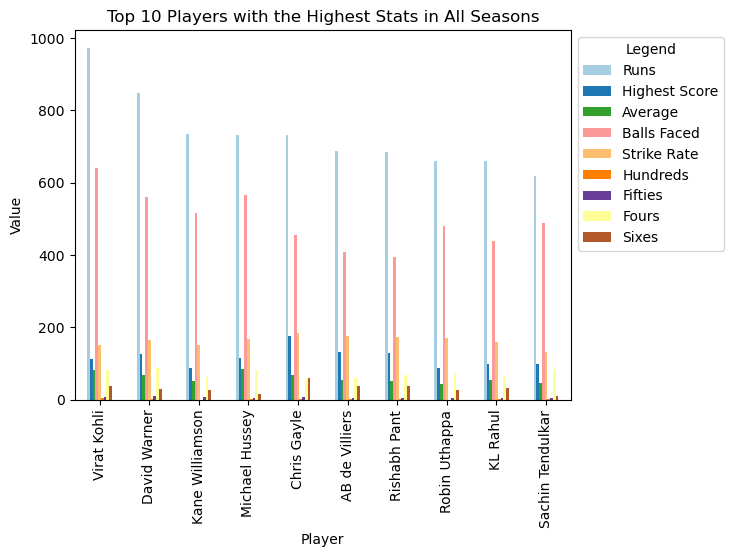

In [73]:
# Calculate the maximum value for each column across all seasons for each player
max_values_by_player = df.groupby('Player').agg({
    'Runs': 'max',
    'Highest Score': 'max',
    'Average': 'max',
    'Balls Faced': 'max',
    'Strike Rate': 'max',
    'Hundreds': 'max',
    'Fifties': 'max',
    'Fours': 'max',
    'Sixes': 'max'
})

# Sort the values and select the top 10 players
max_values_by_player = max_values_by_player.sort_values(by='Runs', ascending=False)[:10]

# Plot the top 10 players with the highest values for each column
plt.figure(figsize=(10, 6))
max_values_by_player.plot(kind='bar', colormap='Paired')
plt.title('Top 10 Players with the Highest Stats in All Seasons')
plt.xlabel('Player')
plt.ylabel('Value')
legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
legend.set_title('Legend')
plt.show()


##### Above is basic visualization to get an idea about the top players over the span of 12 years. Now we can move on to further analysis.



In [74]:
# checking stats of dataset of continous columns

df.describe()

,Matches,Innings,Not Outs,Runs,Highest Score,Average,Balls Faced,Strike Rate,Hundreds,Fifties,Fours,Sixes,Season,Performance
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,10.277129,8.525876,1.788815,179.814691,46.717863,24.142437,139.082638,125.826853,0.047579,0.919032,16.575960,6.713689,2013.507513,560.432563
std,4.566413,4.495119,1.717659,158.182801,27.846198,14.149596,115.175152,27.961644,0.245746,1.414552,16.235541,7.529990,3.451470,342.519797
min,1.000000,1.000000,0.000000,8.000000,4.000000,0.000000,3.000000,47.360000,0.000000,0.000000,0.000000,0.000000,2008.000000,107.780000
25%,6.000000,4.250000,0.000000,47.000000,23.000000,14.202500,41.000000,109.090000,0.000000,0.000000,4.000000,1.000000,2011.000000,275.022500
50%,11.000000,8.000000,1.000000,126.000000,42.000000,22.500000,103.500000,124.060000,0.000000,0.000000,11.000000,4.000000,2014.000000,466.680000
75%,14.000000,13.000000,3.000000,283.750000,66.000000,31.000000,215.750000,139.817500,0.000000,1.000000,25.000000,9.000000,2016.750000,795.702500
max,19.000000,19.000000,10.000000,973.000000,175.000000,152.000000,640.000000,333.330000,4.000000,9.000000,88.000000,59.000000,2019.000000,2127.110000


In [75]:
# checking stats of categorical columns

df.describe(include='O')


,Player,Nationality,Team,Performance Category
count,1198,1198,1198,1198
unique,356,2,9,4
top,Suresh Raina,Indian,Royal Challengers Bangalore,Need Improvement
freq,12,684,157,599


In [76]:
df.columns

Index(['Player', 'Matches', 'Innings', 'Not Outs', 'Runs', 'Highest Score',
       'Average', 'Balls Faced', 'Strike Rate', 'Hundreds', 'Fifties', 'Fours',
       'Sixes', 'Nationality', 'Team', 'Season', 'Performance',
       'Performance Category'],
      dtype='object')

In [77]:
continues = [ 'Matches', 'Innings', 'Not Outs', 'Runs', 'Highest Score',
       'Average', 'Balls Faced', 'Strike Rate', 'Hundreds', 'Fifties', 'Fours',
       'Sixes', 'Performance']

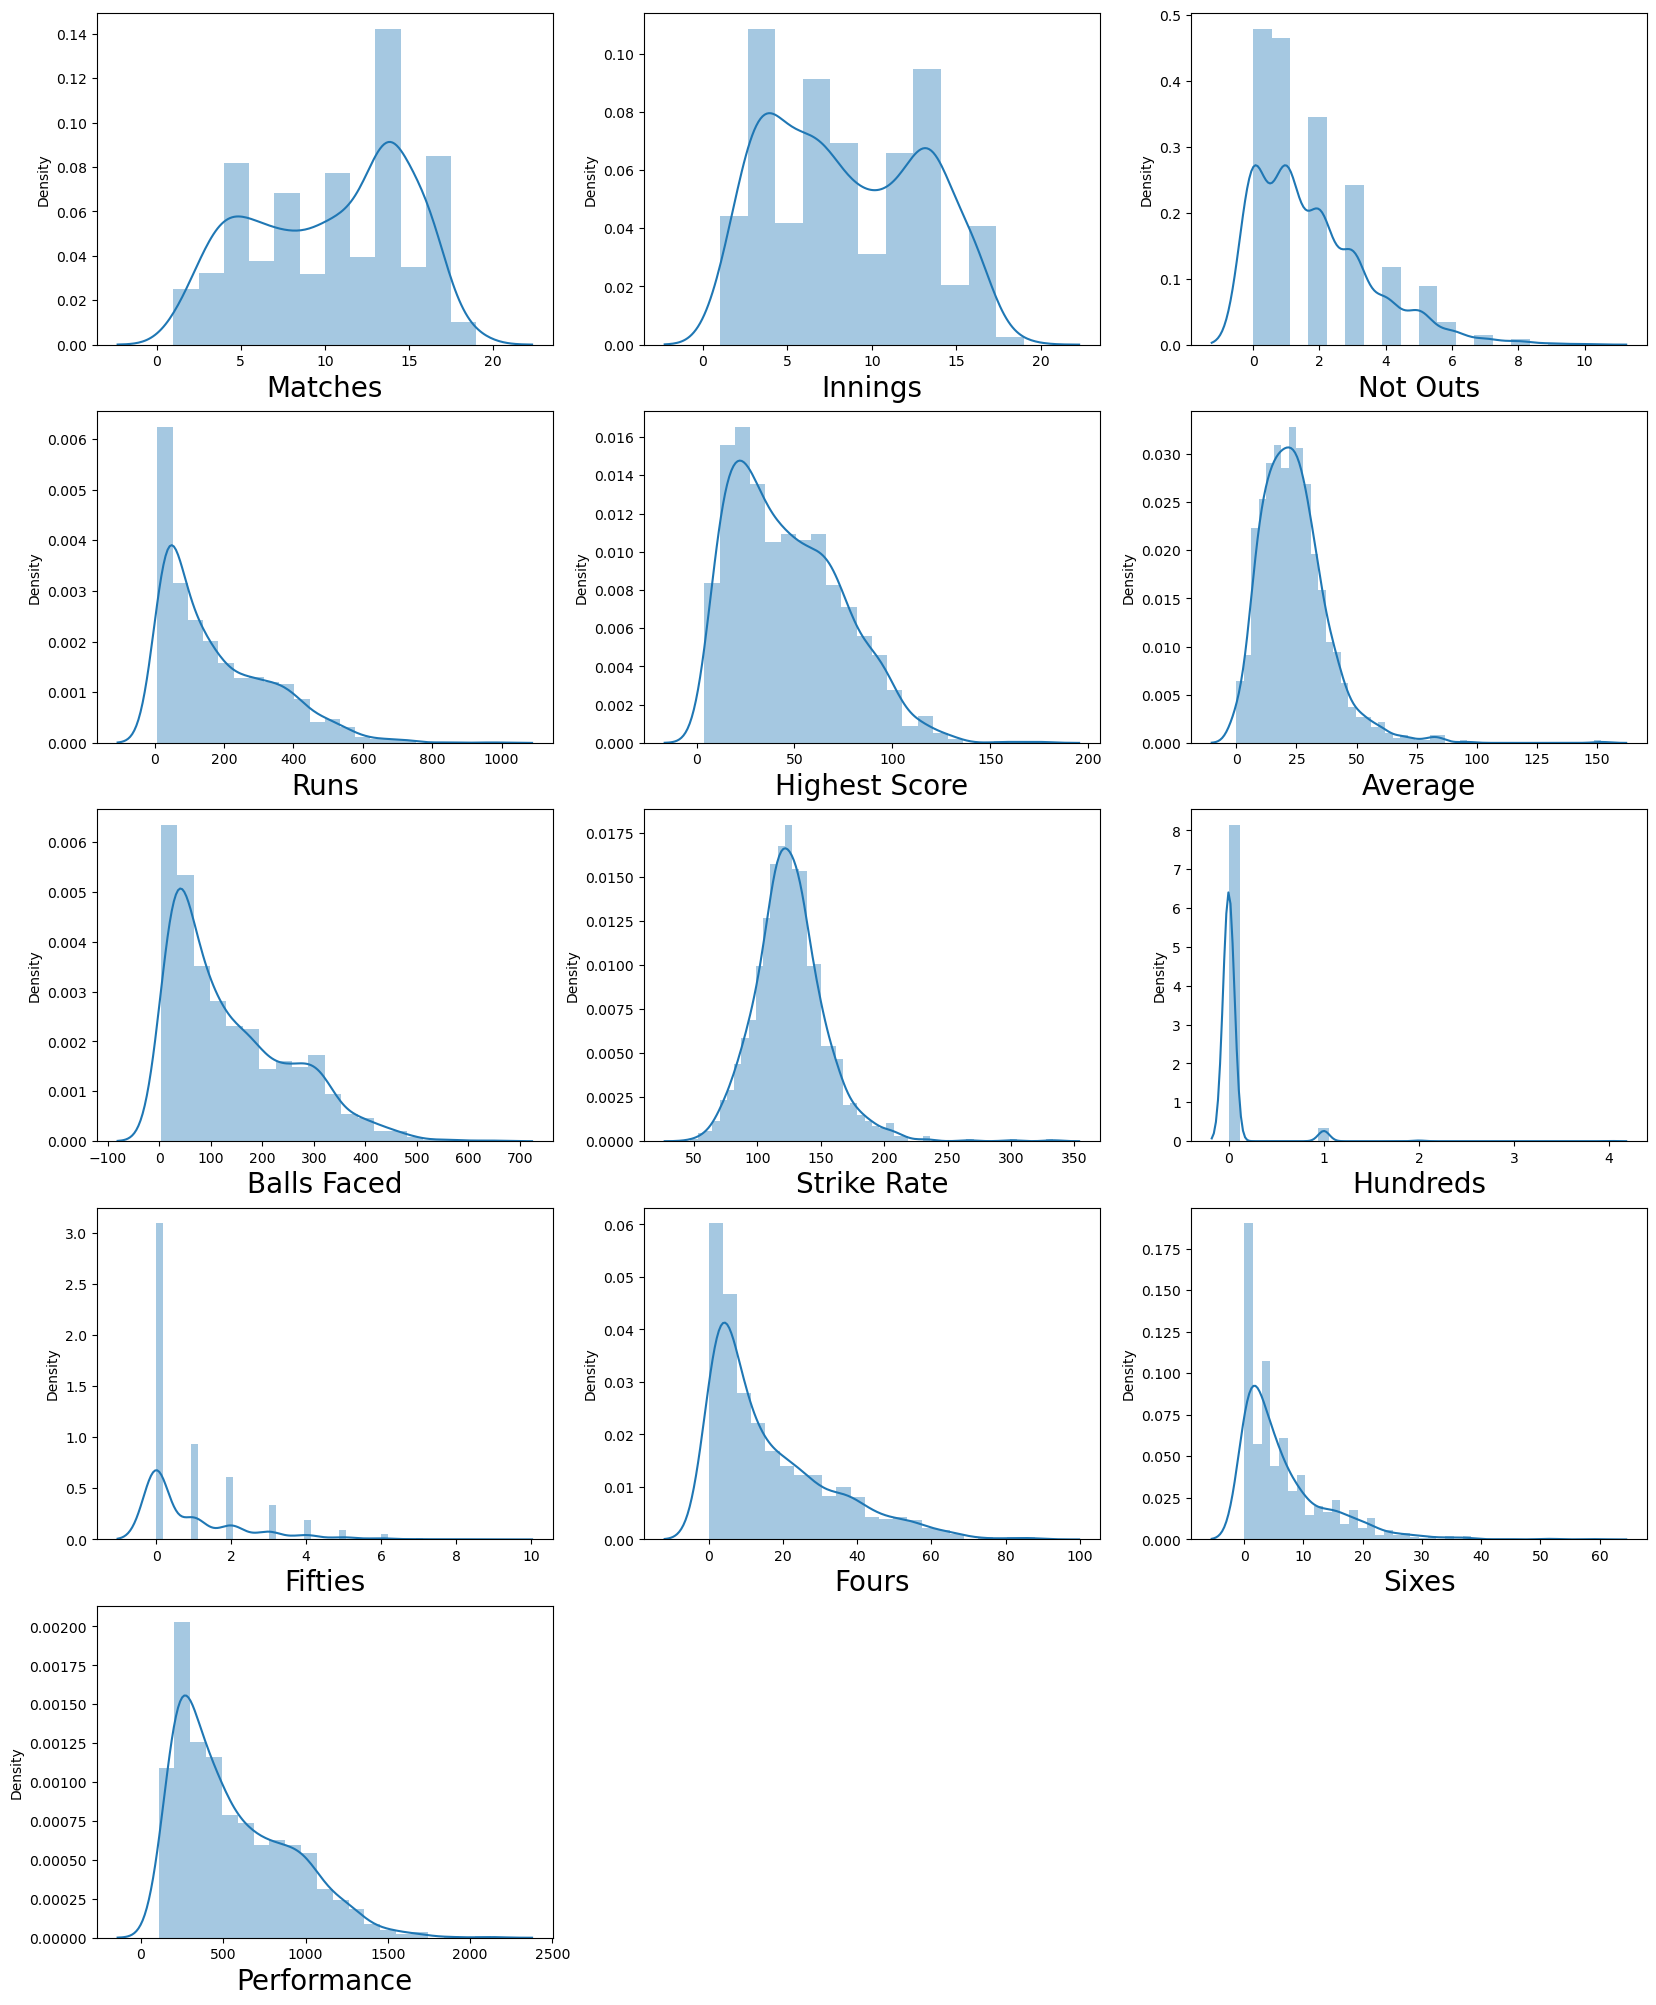

In [78]:
# checking skewness in continous columns

plt.figure(figsize=(20,25))
plotnumber = 1
for column in continues:
    if plotnumber<=13:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()    


* We can see slight skewness in columns but I will not remove them as it show the best players in the span

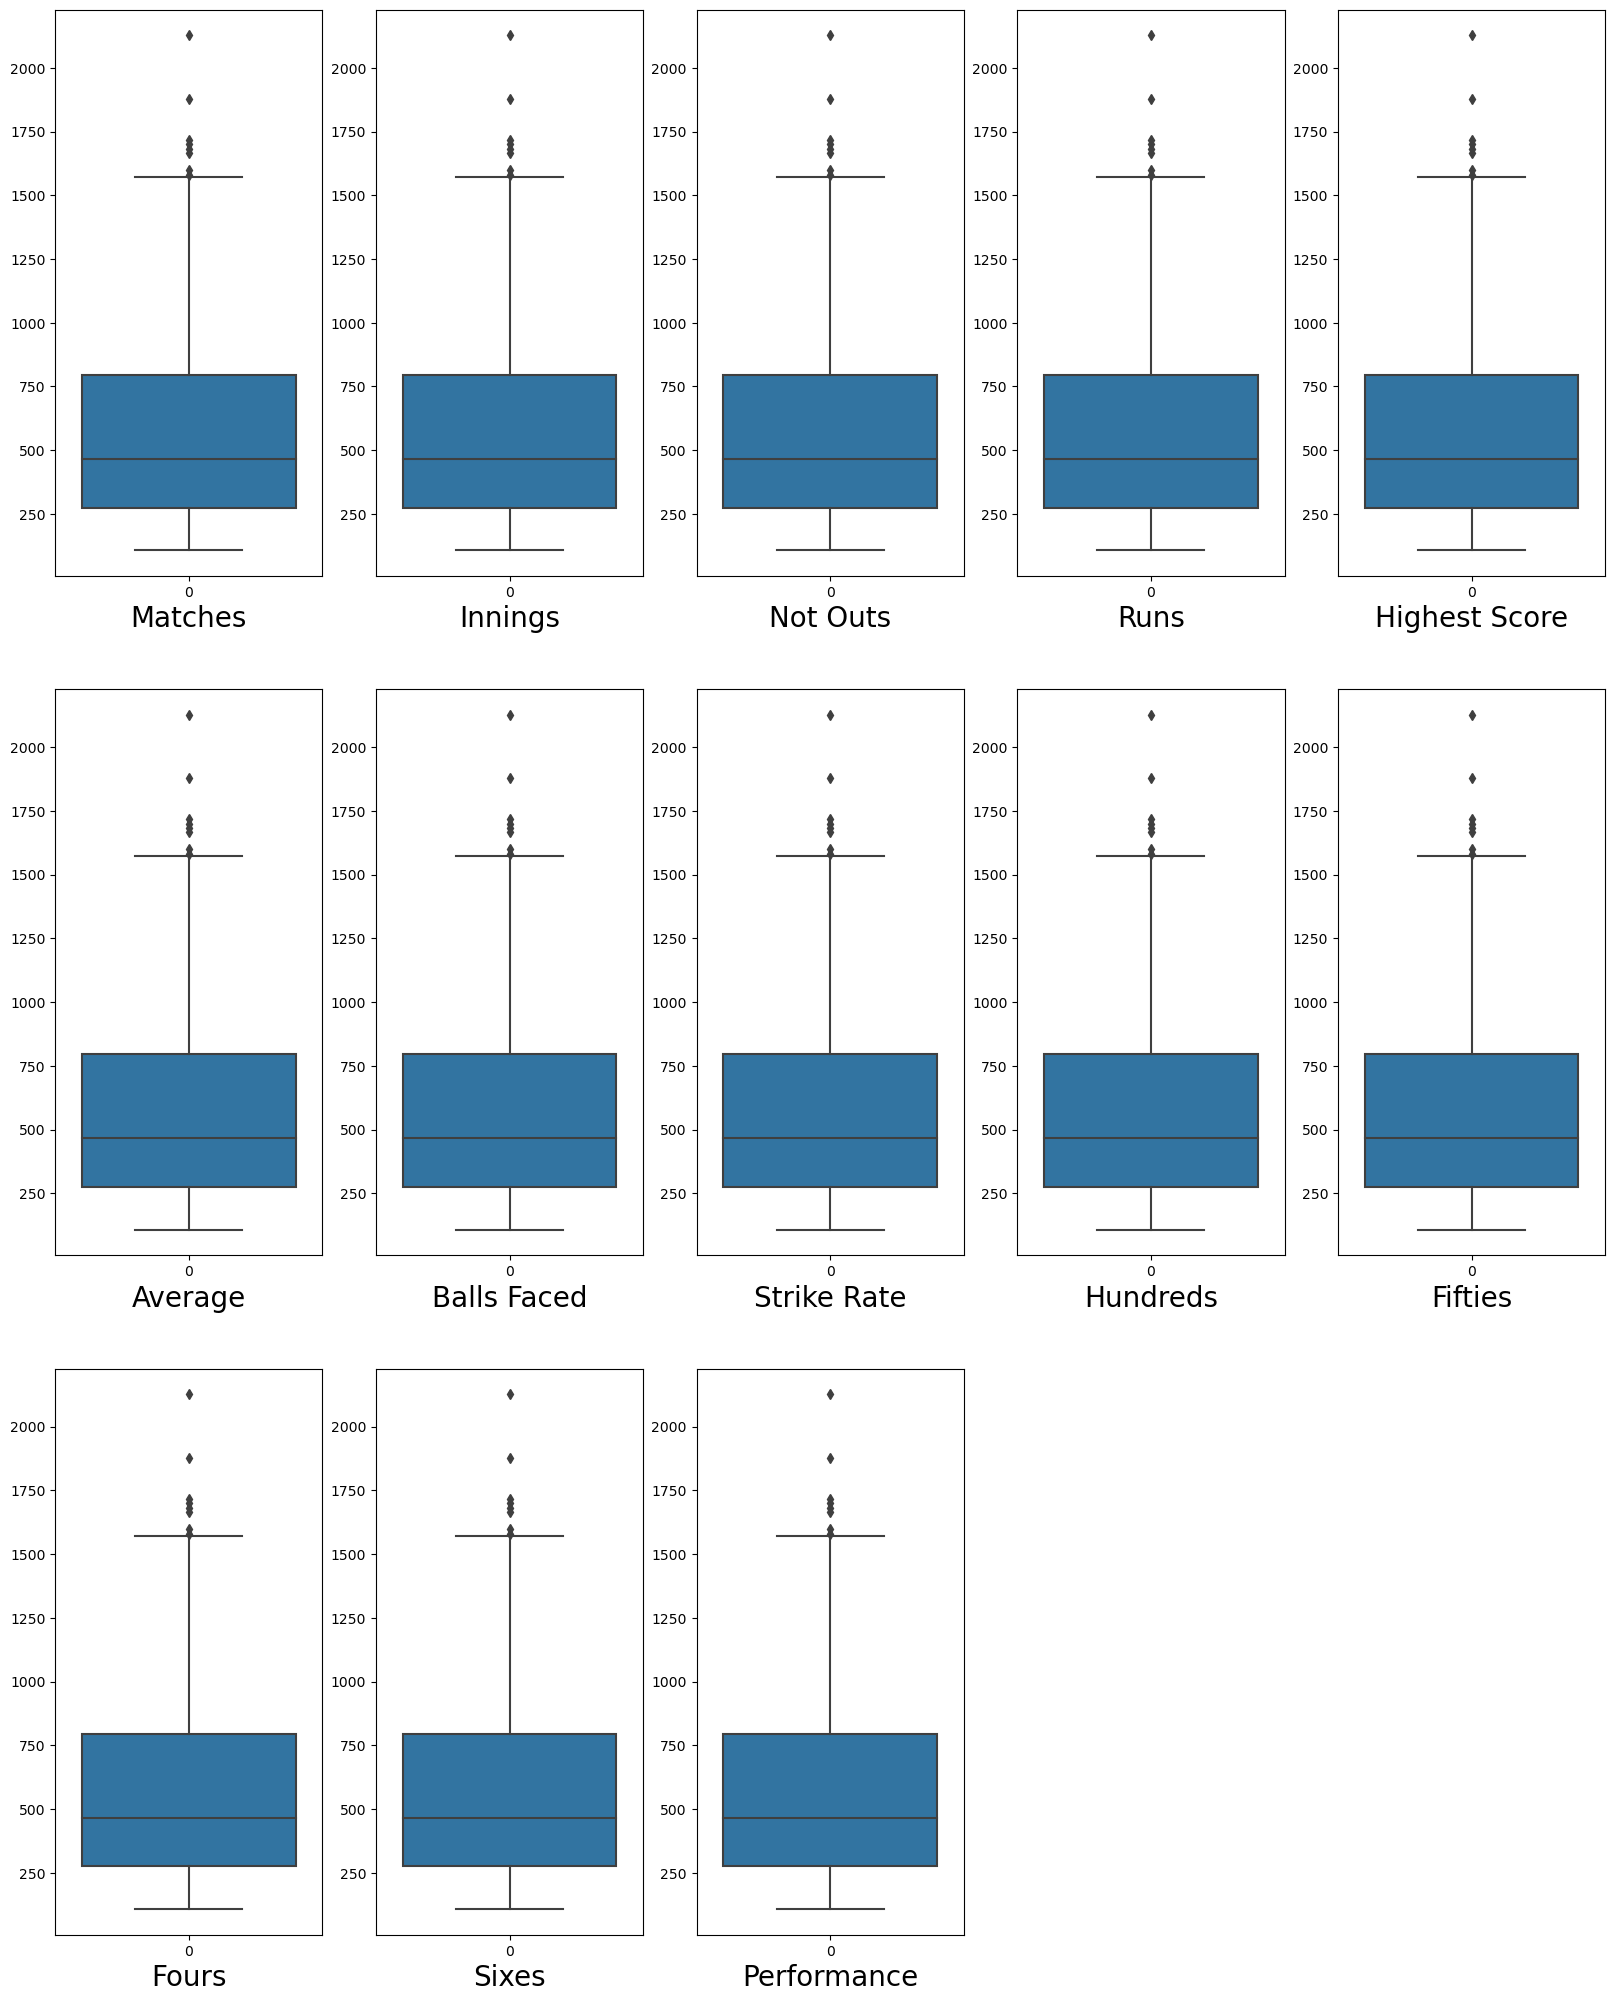

In [79]:
# checking outliers using boxplot

plt.figure(figsize=(20,25))
plotnumber = 1
for i in continues:
    if plotnumber <= 13:
        ax = plt.subplot(3,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(i, fontsize = 20)
    plotnumber+=1
plt.show()    

* There are outliers and skewness in dataset but it is real data and i should not remove it as these outliers are great performers so i'll keep them in data set. But you can further remove outliers using **z-score, quantile range, etc** and remove skewness using data transformation techniques like **box-cox, log, yeo johnson etc**

In [80]:
df = df.drop(columns = ['Player','Nationality', 'Team', 'Season','Performance'])

In [81]:
# converting all object columns into numeric using label encoder

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = lab.fit_transform(df[i])

In [83]:
df

,Matches,Innings,Not Outs,Runs,Highest Score,Average,Balls Faced,Strike Rate,Hundreds,Fifties,Fours,Sixes,Performance Category
0,12,12,2,692,100,69.20,481,143.86,1,8,57,21,2
1,14,14,3,593,100,53.90,438,135.38,1,6,49,25,2
2,16,16,1,529,81,35.26,398,132.91,0,4,45,25,1
3,16,16,1,521,97,34.73,384,135.67,0,5,64,11,1
4,14,13,4,510,80,56.66,249,204.81,0,4,31,52,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,4,2,1,26,25,26.00,27,96.29,0,0,2,0,3
1196,3,3,0,25,16,8.33,31,80.64,0,0,4,0,3
1197,8,4,1,25,23,8.33,22,113.63,0,0,2,1,3
1198,4,3,1,24,9,12.00,22,109.09,0,0,2,1,3


In [84]:
df.columns

Index(['Matches', 'Innings', 'Not Outs', 'Runs', 'Highest Score', 'Average',
       'Balls Faced', 'Strike Rate', 'Hundreds', 'Fifties', 'Fours', 'Sixes',
       'Performance Category'],
      dtype='object')

In [85]:
# seperating data and 'performance category column' for further analysis

x = df.drop(columns=['Performance Category'], axis=1)
y = df['Performance Category']

In [86]:
# scaling the data for analysis

from sklearn.preprocessing import StandardScaler
std = StandardScaler()

x_scaled = std.fit_transform(x)

##### VIF to check multicolinearity and Feature Selection

In [92]:
# applying vif for selecting features and checking multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Variable"] = x.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

vif_data_scaled


,Variable,VIF
0,Matches,4.975320
1,Innings,15.751416
2,Not Outs,2.642895
3,Runs,198.308110
4,Highest Score,5.448534
5,Average,3.745286
6,Balls Faced,80.362486
7,Strike Rate,1.898287
8,Hundreds,1.733600
9,Fifties,5.804586


- 'Runs' has an exceptionally high VIF of 198.308110, indicating a high level of collinearity with other variables.
- 'Balls Faced' and 'Fours' also have relatively high VIF values, suggesting a significant degree of collinearity.

<Axes: >

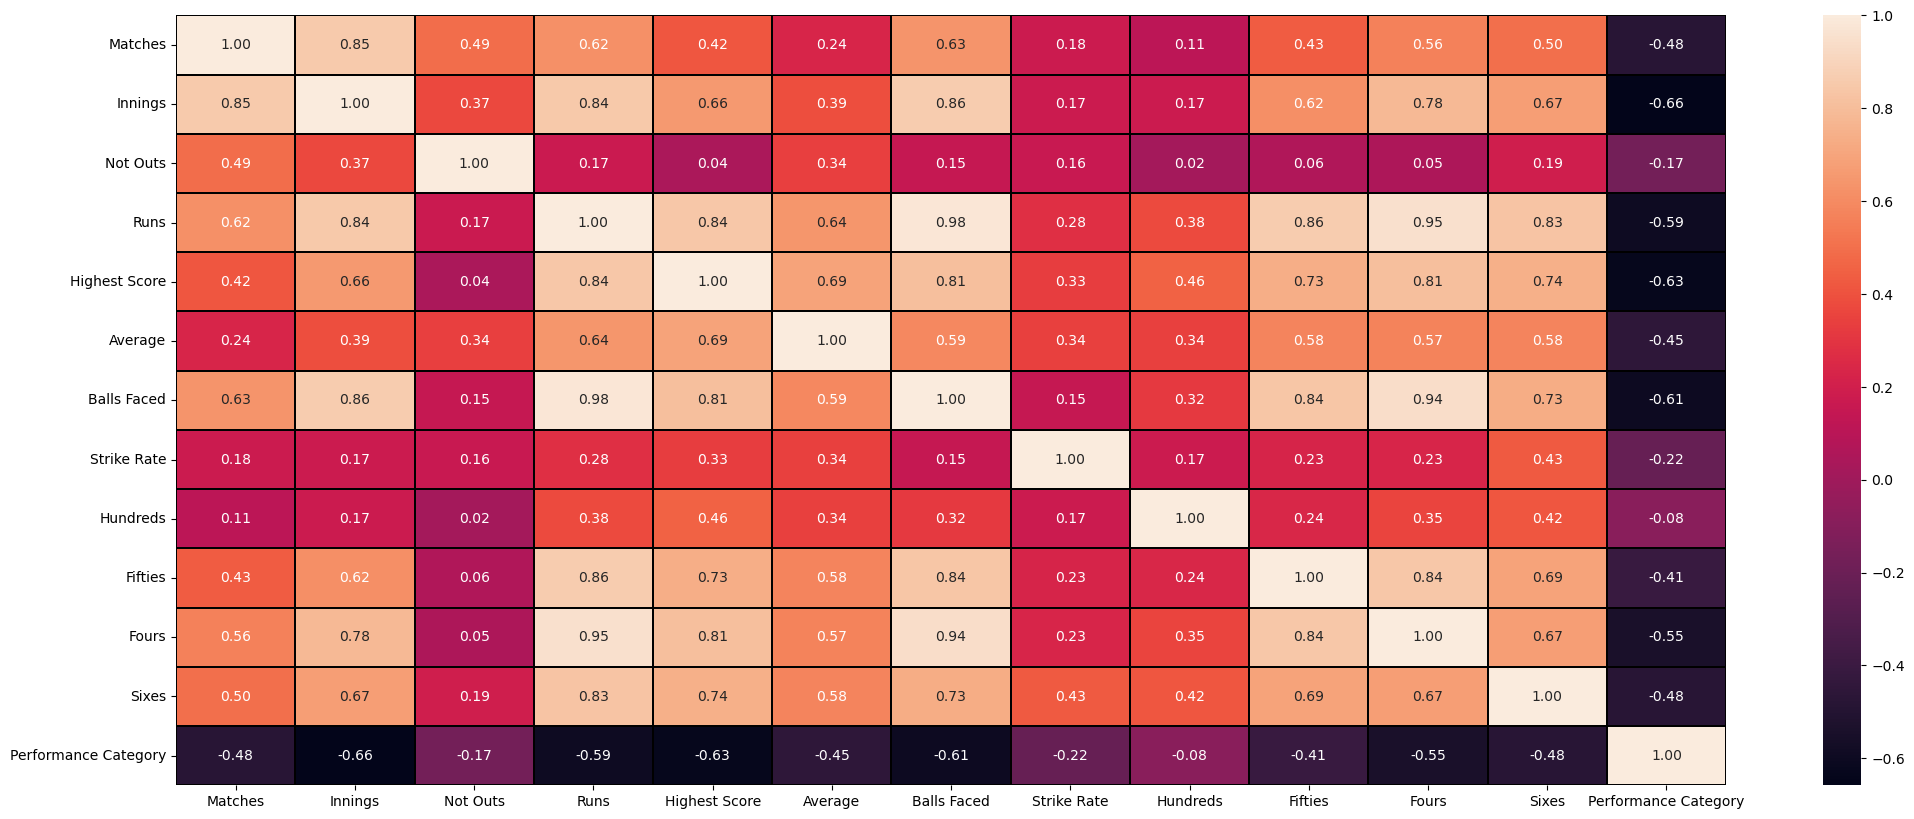

In [94]:
# checking correlation using heatmap

plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=0.1,fmt='0.2f')

- I should remove Hundreds and Fours as they are correlated 

##### Going With PCA to confirm

In [95]:
# using pca for component reduction

from sklearn.decomposition import PCA

pca = PCA()
principal_components = pca.fit_transform(x_scaled)

explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio: ", explained_variance)

Explained Variance Ratio:  [5.80318416e-01 1.18845159e-01 9.93674581e-02 6.59402994e-02
 5.69470415e-02 2.50594021e-02 2.23751713e-02 1.21742969e-02
 1.20120795e-02 4.08328997e-03 2.57907641e-03 2.98309960e-04]


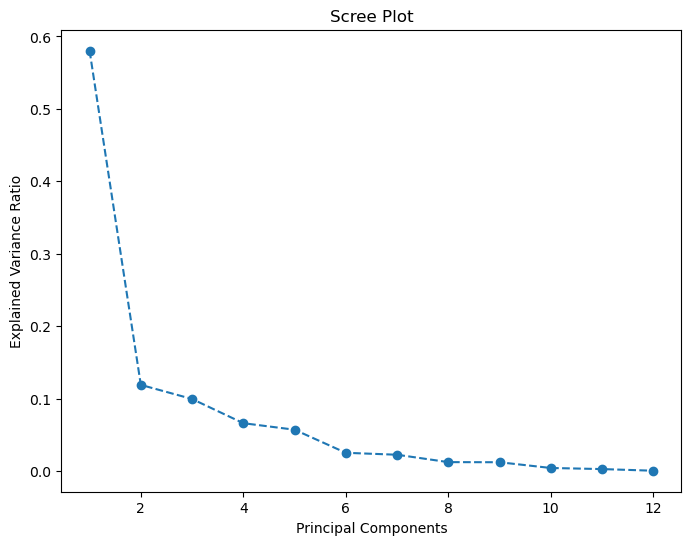

In [96]:
# scree plot for checking variance with components

plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

* 6 component are able to describe more than 90% of data so i'll go with them

In [99]:
# checking those columns

cumulative_variance = np.cumsum(explained_variance)

num_components = 6

selected_features = x.columns[:num_components]

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['Matches', 'Innings', 'Not Outs', 'Runs', 'Highest Score', 'Average'], dtype='object')


##### Model building using K Means Clustring (unsupervised machine learing algorithm)

In [104]:
x = df[['Matches', 'Innings', 'Not Outs', 'Runs', 'Highest Score', 'Average']]
y = df['Performance Category']

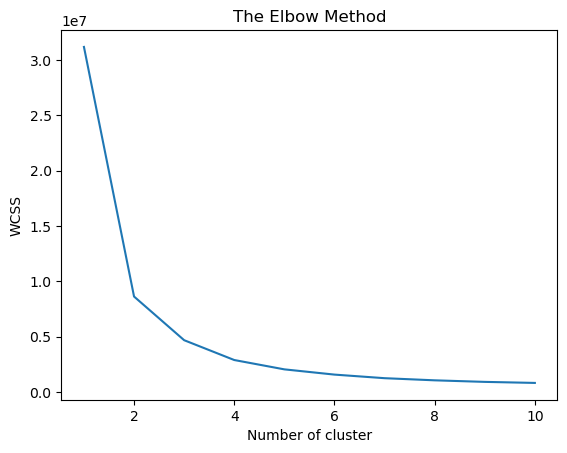

In [105]:
# using elbo method to find best number of cluster

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')                                 # Elbow method can be treated as parameter tuning
plt.show()

- We can se elbo at 4 so it means 4 clusters are sufficient for this dataset 

In [110]:
# fitting K-means to the dataset
kmeans = KMeans(n_clusters=4,random_state=42)
y_means = kmeans.fit_predict(x)

In [114]:
# predicting values in th dataset

Predicted_values = list(y_means)
print(Predicted_values)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

##### Model Evaluation

In [115]:
from sklearn.metrics import silhouette_score

In [116]:
# checking score

silhouette_score(x,y_means)

0.556917214019804

##### Sample Prediction

In [122]:
# it predicts the cluster number to which the data point belongs to
test = kmeans.predict(np.asarray([[12, 12, 2, 692, 100, 69.20]]))
test[0]


3

In [128]:
# keep the same cluster customers in separate dataset
cluster_4_customers = x[y_means==2]
print(cluster_4_customers)

      Matches  Innings  Not Outs  Runs  Highest Score  Average
10         13       13         3   442             82    44.20
11         16       15         2   424             71    32.61
12         15       12         7   416             84    83.20
13         13       13         0   405             82    31.15
14         15       15         1   405             67    28.92
...       ...      ...       ...   ...            ...      ...
1116       13       13         2   319             71    29.00
1117        9        9         0   311             60    34.55
1118       13       13         2   302             54    27.45
1119       15       14         1   299             57    23.00
1120       11       10         2   288             71    36.00

[246 rows x 6 columns]


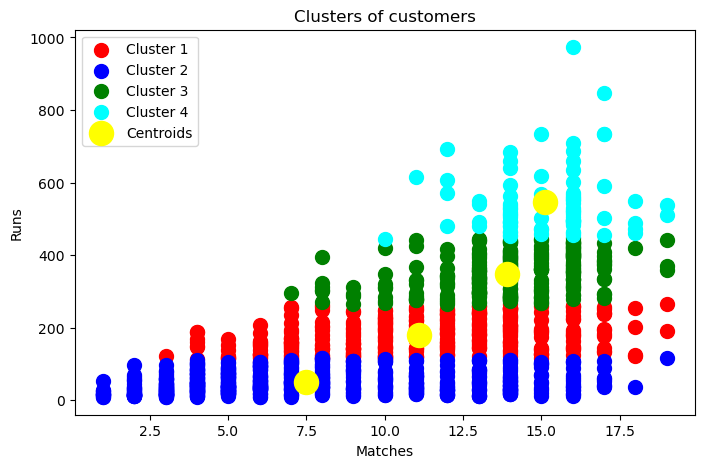

In [131]:
# Visualising the clusters
plt.figure(figsize=(8,5))
plt.scatter(x[y_means == 0]['Matches'], x[y_means == 0]['Runs'], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(x[y_means == 1]['Matches'], x[y_means == 1]['Runs'], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(x[y_means == 2]['Matches'], x[y_means == 2]['Runs'], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(x[y_means == 3]['Matches'], x[y_means == 3]['Runs'], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Matches')
plt.ylabel('Runs')
plt.legend()
plt.show()


In [132]:
kmeans.cluster_centers_

array([[ 11.09235669,   9.70382166,   2.04140127, 179.4522293 ,
         53.43949045,  26.43200637],
       [  7.48468468,   4.77657658,   1.47567568,  50.22702703,
         24.3963964 ,  16.16126126],
       [ 13.90243902,  13.30487805,   2.        , 348.74390244,
         72.98780488,  32.38272358],
       [ 15.12048193,  14.97590361,   2.30120482, 547.02409639,
         92.68674699,  44.42578313]])

In [137]:
# saving the model

import joblib

joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

#### We can also make a model using supervised machine learning:
##### Supervised machine learning model 

In [144]:
# scaling the data

from sklearn.preprocessing import StandardScaler
std = StandardScaler()

x_scaled = std.fit_transform(x)

In [145]:
x_scaled

array([[ 0.37744967,  0.77318848,  0.12300087,  3.23928522,  1.91424299,
         3.18570074],
       [ 0.81561315,  1.21830132,  0.70543189,  2.61316567,  1.91424299,
         2.10394623],
       [ 1.25377662,  1.66341415, -0.45943014,  2.20840151,  1.23163867,
         0.78604401],
       ...,
       [-0.49887728, -1.00726285, -0.45943014, -0.97911622, -0.85210083,
        -1.11798532],
       [-1.37520423, -1.22981926, -0.45943014, -0.98544065, -1.35507244,
        -0.85850564],
       [-1.59428597, -1.22981926, -1.04186115, -0.99176509, -0.88802738,
        -1.16535627]])

In [147]:
column_names = ['Matches', 'Innings', 'Not Outs', 'Runs', 'Highest Score', 'Average']

x_scaled = pd.DataFrame(x_scaled, columns=column_names)

x_scaled

,Matches,Innings,Not Outs,Runs,Highest Score,Average
0,0.377450,0.773188,0.123001,3.239285,1.914243,3.185701
1,0.815613,1.218301,0.705432,2.613166,1.914243,2.103946
2,1.253777,1.663414,-0.459430,2.208402,1.231639,0.786044
3,1.253777,1.663414,-0.459430,2.157806,1.806463,0.748571
4,0.815613,0.995745,1.287863,2.088237,1.195712,2.299086
...,...,...,...,...,...,...
1193,-1.375204,-1.452376,-0.459430,-0.972792,-0.780248,0.131335
1194,-1.594286,-1.229819,-1.041861,-0.979116,-1.103587,-1.117985
1195,-0.498877,-1.007263,-0.459430,-0.979116,-0.852101,-1.117985
1196,-1.375204,-1.229819,-0.459430,-0.985441,-1.355072,-0.858506


In [155]:
# Importing Machine Learning Model/Algorithm libraries

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,precision_score,classification_report,accuracy_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score


In [152]:
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled,y, random_state=66, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (838, 6)
Training target vector size: (838,)
Test feature matrix size: (360, 6)
Test target vector size: (360,)


##### Logistics Regression

In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, random_state=99, test_size=0.3)
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
y_pred = log_reg.predict(X_test)

print('\033[1m' + 'Logistics Regression Evaluation' + '\033[0m')
print('\n')
print('\033[1m' + 'Accuracy Score of Logistics Regression :' + '\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m' + 'Precision Score of Logistics Regression :' + '\033[0m', precision_score(Y_test, y_pred, average='micro'))
print('\n')
print('\033[1m' + 'Confusion matrix of Logistics Regression :' + '\033[0m \n', confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m' + 'classification Report of Logistics Regression' + '\033[0m \n', classification_report(Y_test, y_pred))


Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.9555555555555556


Precision Score of Logistics Regression : 0.9555555555555556


Confusion matrix of Logistics Regression : 
 [[ 93   0   0   1]
 [  5  66   0   0]
 [  0   3   5   0]
 [  7   0   0 180]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.89      0.99      0.93        94
           1       0.96      0.93      0.94        71
           2       1.00      0.62      0.77         8
           3       0.99      0.96      0.98       187

    accuracy                           0.96       360
   macro avg       0.96      0.88      0.91       360
weighted avg       0.96      0.96      0.96       360



In [162]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Precision Score of Random Forest Classifier :'+'\033[0m', precision_score(Y_test, y_pred,average='micro'))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))


Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.9722222222222222


Precision Score of Random Forest Classifier : 0.9722222222222222


Confusion matrix of Random Forest Classifier : 
 [[ 90   2   0   2]
 [  1  70   0   0]
 [  0   1   7   0]
 [  4   0   0 183]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        94
           1       0.96      0.99      0.97        71
           2       1.00      0.88      0.93         8
           3       0.99      0.98      0.98       187

    accuracy                           0.97       360
   macro avg       0.97      0.95      0.96       360
weighted avg       0.97      0.97      0.97       360



In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score:  0.9785072711719419


In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# Initialize the Random Forest Classifier with the best parameters
best_rfc = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1)

# Fit the classifier on the training data
best_rfc.fit(X_train, Y_train)

# Make predictions on the test data
y_pred_best = best_rfc.predict(X_test)

# Print the evaluation metrics
print('\033[1m' + 'Random Forest Classifier' + '\033[0m')
print('\n')
print('\033[1m' + 'Accuracy Score of Random Forest Classifier :' + '\033[0m', accuracy_score(Y_test, y_pred_best))
print('\n')
print('\033[1m' + 'Precision Score of Random Forest Classifier :' + '\033[0m', precision_score(Y_test, y_pred_best, average='micro'))
print('\n')
print('\033[1m' + 'Confusion matrix of Random Forest Classifier :' + '\033[0m \n', confusion_matrix(Y_test, y_pred_best))
print('\n')
print('\033[1m' + 'classification Report of Random Forest Classifier' + '\033[0m \n', classification_report(Y_test, y_pred_best))


Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.9722222222222222


Precision Score of Random Forest Classifier : 0.9722222222222222


Confusion matrix of Random Forest Classifier : 
 [[ 89   2   0   3]
 [  1  70   0   0]
 [  0   1   7   0]
 [  3   0   0 184]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        94
           1       0.96      0.99      0.97        71
           2       1.00      0.88      0.93         8
           3       0.98      0.98      0.98       187

    accuracy                           0.97       360
   macro avg       0.97      0.95      0.96       360
weighted avg       0.97      0.97      0.97       360



In [165]:
import pickle

with open('Sup_RFC.pkl', 'wb') as model_file:
    pickle.dump(best_rfc, model_file)

##### Sample testing

In [173]:
X_test_array = X_test.to_numpy()

single_data_point = X_test_array[0].reshape(1, -1)

prediction = best_rfc.predict(single_data_point)

print(prediction[0])

1
